### Chapter 10 인공 신경망 소개

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import os
os.name
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
import os
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
X_new = X_test[:3]

In [2]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

#### 조기종료 구현

In [5]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 924us/step - loss: 1.5010 - val_loss: 0.9570
Epoch 2/10
363/363 [==============================] - 0s 691us/step - loss: 0.6885 - val_loss: 0.6370
Epoch 3/10
363/363 [==============================] - 0s 662us/step - loss: 0.6097 - val_loss: 0.5949
Epoch 4/10
363/363 [==============================] - 0s 690us/step - loss: 0.5637 - val_loss: 0.5383
Epoch 5/10
363/363 [==============================] - 0s 677us/step - loss: 0.5308 - val_loss: 0.5253
Epoch 6/10
363/363 [==============================] - 0s 682us/step - loss: 0.5061 - val_loss: 0.4905
Epoch 7/10
363/363 [==============================] - 0s 680us/step - loss: 0.4879 - val_loss: 0.4717
Epoch 8/10
363/363 [==============================] - 0s 725us/step - loss: 0.4739 - val_loss: 0.4493
Epoch 9/10
363/363 [==============================] - 0s 674us/step - loss: 0.4620 - val_loss: 0.4328
Epoch 10/10
162/162 [==============================] - 0s 486us/step - loss: 0.446

In [6]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)


Epoch 1/100
363/363 [==============================] - 0s 785us/step - loss: 0.4436 - val_loss: 0.4145
Epoch 2/100
363/363 [==============================] - 0s 671us/step - loss: 0.4364 - val_loss: 0.4071
Epoch 3/100
363/363 [==============================] - 0s 677us/step - loss: 0.4294 - val_loss: 0.4034
Epoch 4/100
363/363 [==============================] - 0s 686us/step - loss: 0.4243 - val_loss: 0.3965
Epoch 5/100
363/363 [==============================] - 0s 678us/step - loss: 0.4196 - val_loss: 0.3922
Epoch 6/100
363/363 [==============================] - 0s 715us/step - loss: 0.4149 - val_loss: 0.3883
Epoch 7/100
363/363 [==============================] - 0s 669us/step - loss: 0.4107 - val_loss: 0.3878
Epoch 8/100
363/363 [==============================] - 0s 712us/step - loss: 0.4070 - val_loss: 0.3864
Epoch 9/100
363/363 [==============================] - 0s 719us/step - loss: 0.4036 - val_loss: 0.3817
Epoch 10/100
363/363 [==============================] - 0s 661us/step - l

Epoch 80/100
363/363 [==============================] - 0s 712us/step - loss: 0.3364 - val_loss: 0.3268
Epoch 81/100
363/363 [==============================] - 0s 629us/step - loss: 0.3359 - val_loss: 0.3355
Epoch 82/100
162/162 [==============================] - 0s 439us/step - loss: 0.3413


#### 사용자 정의 콜백

In [7]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [8]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

307/363 [========================>.....] - ETA: 0s - loss: 0.3428
val/train: 1.00
363/363 [==============================] - 0s 645us/step - loss: 0.3393 - val_loss: 0.3389


### 텐서보드

In [9]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [10]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_04_15-10_24_13'

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [13]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 795us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 601us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 713us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 660us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 670us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 719us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 632us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 752us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 649us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 676us/step - loss: 0.447

In [14]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

### 10.3 신경망 하이퍼파라미터 튜닝

In [15]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [16]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\exem\AppData\Local\Temp/ipykernel_8704/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [23]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 741us/step - loss: 1.4901 - val_loss: 59.6889
Epoch 2/100
363/363 [==============================] - 0s 577us/step - loss: 1.0909 - val_loss: 0.5356
Epoch 3/100
363/363 [==============================] - 0s 599us/step - loss: 0.5441 - val_loss: 0.4837
Epoch 4/100
363/363 [==============================] - 0s 624us/step - loss: 0.4990 - val_loss: 0.4598
Epoch 5/100
363/363 [==============================] - 0s 626us/step - loss: 0.4765 - val_loss: 0.4264
Epoch 6/100
363/363 [==============================] - 0s 590us/step - loss: 0.4545 - val_loss: 0.4162
Epoch 7/100
363/363 [==============================] - 0s 686us/step - loss: 0.4452 - val_loss: 0.4020
Epoch 8/100
363/363 [==============================] - 0s 633us/step - loss: 0.4346 - val_loss: 0.3972
Epoch 9/100
363/363 [==============================] - 0s 609us/step - loss: 0.4258 - val_loss: 0.3973
Epoch 10/100
363/363 [==============================] - 0s 621us/step - 

In [24]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 913us/step - loss: 1.0712 - val_loss: 0.5093
Epoch 2/100
242/242 [==============================] - 0s 666us/step - loss: 0.6589 - val_loss: 0.5636
Epoch 3/100
242/242 [==============================] - 0s 678us/step - loss: 0.4816 - val_loss: 0.4047
Epoch 4/100
242/242 [==============================] - 0s 654us/step - loss: 0.4334 - val_loss: 0.3908
Epoch 5/100
242/242 [==============================] - 0s 661us/step - loss: 0.4276 - val_loss: 0.3923
Epoch 6/100
242/242 [==============================] - 0s 905us/step - loss: 0.4183 - val_loss: 0.3860
Epoch 7/100
242/242 [==============================] - 0s 721us/step - loss: 0.4113 - val_loss: 0.3791
Epoch 8/100
242/242 [==============================] - 0s 688us/step - loss: 0.4095 - val_loss: 0.3773
Epoch 9/100
242/242 [==============================] - 0s 644us/step - loss: 0.4024 - val_loss: 0.3780
Epoch 10/100

Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.6372
Epoch 24/100
242/242 [==============================] - 0s 815us/step - loss: 0.4128 - val_loss: 0.4144
Epoch 25/100
121/121 [==============================] - 0s 472us/step - loss: 0.4294
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=   4.8s
Epoch 1/100
242/242 [==============================] - 0s 993us/step - loss: 0.8645 - val_loss: 0.5069
Epoch 2/100
242/242 [==============================] - 0s 727us/step - loss: 0.4860 - val_loss: 0.4205
Epoch 3/100
242/242 [==============================] - 0s 745us/step - loss: 0.4444 - val_loss: 0.3948
Epoch 4/100
242/242 [==============================] - 0s 698us/step - loss: 0.4314 - val_loss: 0.3961
Epoch 5/100
242/242 [==============================] - 0s 760us/step - loss: 0.4302 - val_loss: 0.3958
Epoch 6/100
242/242 [==============================] - 0s 740us/step - loss: 0.4275 - val_loss: 0.4047
Ep

242/242 [==============================] - 0s 849us/step - loss: 0.2849 - val_loss: 0.4040
Epoch 58/100
242/242 [==============================] - 0s 866us/step - loss: 0.2845 - val_loss: 0.3209
Epoch 59/100
242/242 [==============================] - 0s 889us/step - loss: 0.2832 - val_loss: 0.2856
Epoch 60/100
242/242 [==============================] - 0s 848us/step - loss: 0.2824 - val_loss: 0.3348
Epoch 61/100
242/242 [==============================] - 0s 849us/step - loss: 0.2824 - val_loss: 0.3453
Epoch 62/100
242/242 [==============================] - 0s 895us/step - loss: 0.2805 - val_loss: 0.3675
Epoch 63/100
242/242 [==============================] - 0s 880us/step - loss: 0.2816 - val_loss: 0.2949
Epoch 64/100
242/242 [==============================] - 0s 886us/step - loss: 0.2797 - val_loss: 0.4615
Epoch 65/100
242/242 [==============================] - 0s 867us/step - loss: 0.2788 - val_loss: 0.2983
Epoch 66/100
242/242 [==============================] - 0s 854us/step - loss:

242/242 [==============================] - 0s 968us/step - loss: 0.3054 - val_loss: 0.3108
Epoch 49/100
242/242 [==============================] - 0s 970us/step - loss: 0.3030 - val_loss: 0.3513
Epoch 50/100
242/242 [==============================] - 0s 965us/step - loss: 0.3023 - val_loss: 0.3214
Epoch 51/100
242/242 [==============================] - 0s 973us/step - loss: 0.3019 - val_loss: 0.3575
Epoch 52/100
242/242 [==============================] - 0s 902us/step - loss: 0.3013 - val_loss: 0.3243
Epoch 53/100
242/242 [==============================] - 0s 980us/step - loss: 0.3008 - val_loss: 0.3092
Epoch 54/100
242/242 [==============================] - 0s 879us/step - loss: 0.2994 - val_loss: 0.3567
Epoch 55/100
121/121 [==============================] - 0s 582us/step - loss: 0.3041
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=  12.6s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 3.4708 - val_loss: 3.2118
Epoch 2/1

242/242 [==============================] - 0s 1ms/step - loss: 0.4453 - val_loss: 0.4187
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4439 - val_loss: 0.4174
Epoch 72/100
242/242 [==============================] - 0s 961us/step - loss: 0.4424 - val_loss: 0.4164
Epoch 73/100
242/242 [==============================] - 0s 893us/step - loss: 0.4411 - val_loss: 0.4146
Epoch 74/100
242/242 [==============================] - 0s 902us/step - loss: 0.4397 - val_loss: 0.4133
Epoch 75/100
242/242 [==============================] - 0s 904us/step - loss: 0.4384 - val_loss: 0.4125
Epoch 76/100
242/242 [==============================] - 0s 824us/step - loss: 0.4371 - val_loss: 0.4109
Epoch 77/100
242/242 [==============================] - 0s 847us/step - loss: 0.4359 - val_loss: 0.4100
Epoch 78/100
242/242 [==============================] - 0s 801us/step - loss: 0.4347 - val_loss: 0.4092
Epoch 79/100
242/242 [==============================] - 0s 907us/step - loss: 0.4

242/242 [==============================] - 0s 945us/step - loss: 0.5146 - val_loss: 0.4916
Epoch 25/100
242/242 [==============================] - 0s 857us/step - loss: 0.5107 - val_loss: 0.4862
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5070 - val_loss: 0.4838
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4776
Epoch 28/100
242/242 [==============================] - 0s 903us/step - loss: 0.4999 - val_loss: 0.4743
Epoch 29/100
242/242 [==============================] - 0s 896us/step - loss: 0.4966 - val_loss: 0.4710
Epoch 30/100
242/242 [==============================] - 0s 926us/step - loss: 0.4935 - val_loss: 0.4680
Epoch 31/100
242/242 [==============================] - 0s 860us/step - loss: 0.4905 - val_loss: 0.4643
Epoch 32/100
242/242 [==============================] - 0s 811us/step - loss: 0.4876 - val_loss: 0.4618
Epoch 33/100
242/242 [==============================] - 0s 866us/step - loss: 0.4

242/242 [==============================] - 0s 976us/step - loss: 0.3849 - val_loss: 0.3921
Epoch 19/100
242/242 [==============================] - 0s 910us/step - loss: 0.3813 - val_loss: 0.3926
Epoch 20/100
242/242 [==============================] - 0s 930us/step - loss: 0.3791 - val_loss: 0.3902
Epoch 21/100
242/242 [==============================] - 0s 902us/step - loss: 0.3765 - val_loss: 0.3947
Epoch 22/100
242/242 [==============================] - 0s 908us/step - loss: 0.3740 - val_loss: 0.3871
Epoch 23/100
242/242 [==============================] - 0s 953us/step - loss: 0.3718 - val_loss: 0.3883
Epoch 24/100
242/242 [==============================] - 0s 964us/step - loss: 0.3699 - val_loss: 0.3676
Epoch 25/100
242/242 [==============================] - 0s 974us/step - loss: 0.3678 - val_loss: 0.3876
Epoch 26/100
242/242 [==============================] - 0s 970us/step - loss: 0.3663 - val_loss: 0.3636
Epoch 27/100
242/242 [==============================] - 0s 926us/step - loss:

242/242 [==============================] - 0s 957us/step - loss: 0.3893 - val_loss: 0.3931
Epoch 19/100
242/242 [==============================] - 0s 899us/step - loss: 0.3867 - val_loss: 0.4320
Epoch 20/100
242/242 [==============================] - 0s 921us/step - loss: 0.3839 - val_loss: 0.3774
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3817 - val_loss: 0.3899
Epoch 22/100
242/242 [==============================] - 0s 944us/step - loss: 0.3800 - val_loss: 0.3633
Epoch 23/100
242/242 [==============================] - 0s 817us/step - loss: 0.3778 - val_loss: 0.3616
Epoch 24/100
242/242 [==============================] - 0s 850us/step - loss: 0.3753 - val_loss: 0.4437
Epoch 25/100
242/242 [==============================] - 0s 930us/step - loss: 0.3750 - val_loss: 0.3567
Epoch 26/100
242/242 [==============================] - 0s 869us/step - loss: 0.3725 - val_loss: 0.3589
Epoch 27/100
242/242 [==============================] - 0s 917us/step - loss: 0

121/121 [==============================] - 0s 507us/step - loss: 0.9637
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   2.3s
Epoch 1/100
242/242 [==============================] - 0s 931us/step - loss: 1.2374 - val_loss: 471.0732
Epoch 2/100
242/242 [==============================] - 0s 839us/step - loss: 1.2107 - val_loss: 154.7186
Epoch 3/100
242/242 [==============================] - 0s 786us/step - loss: 1.5954 - val_loss: 1000.0496
Epoch 4/100
242/242 [==============================] - 0s 825us/step - loss: 44.3432 - val_loss: 874.5897
Epoch 5/100
242/242 [==============================] - 0s 793us/step - loss: 1.4489 - val_loss: 2978.5977
Epoch 6/100
242/242 [==============================] - 0s 799us/step - loss: 10.4356 - val_loss: 1643.2432
Epoch 7/100
242/242 [==============================] - 0s 816us/step - loss: 5.2959 - val_loss: 1723.9075
Epoch 8/100
242/242 [==============================] - 0s 848us/step - loss: 46.9748 - val_loss: 1

242/242 [==============================] - 0s 968us/step - loss: 0.3619 - val_loss: 0.7317
Epoch 12/100
242/242 [==============================] - 0s 947us/step - loss: 0.3573 - val_loss: 0.7434
Epoch 13/100
242/242 [==============================] - 0s 938us/step - loss: 0.3542 - val_loss: 0.8288
Epoch 14/100
242/242 [==============================] - 0s 948us/step - loss: 0.3518 - val_loss: 0.9181
Epoch 15/100
121/121 [==============================] - 0s 589us/step - loss: 0.3631
[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=   3.8s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1925 - val_loss: 2.6833
Epoch 2/100
242/242 [==============================] - 0s 912us/step - loss: 0.5754 - val_loss: 2.0872
Epoch 3/100
242/242 [==============================] - 0s 935us/step - loss: 0.5045 - val_loss: 2.2561
Epoch 4/100
242/242 [==============================] - 0s 945us/step - loss: 0.4737 - val_loss: 1.3509
Epoch 5/100
24

242/242 [==============================] - 0s 829us/step - loss: 0.3909 - val_loss: 0.3747
Epoch 33/100
242/242 [==============================] - 0s 898us/step - loss: 0.3888 - val_loss: 0.3837
Epoch 34/100
242/242 [==============================] - 0s 824us/step - loss: 0.3877 - val_loss: 0.3705
Epoch 35/100
242/242 [==============================] - 0s 907us/step - loss: 0.3863 - val_loss: 0.3780
Epoch 36/100
242/242 [==============================] - 0s 840us/step - loss: 0.3846 - val_loss: 0.4122
Epoch 37/100
242/242 [==============================] - 0s 845us/step - loss: 0.3844 - val_loss: 0.4619
Epoch 38/100
242/242 [==============================] - 0s 848us/step - loss: 0.3827 - val_loss: 0.4970
Epoch 39/100
242/242 [==============================] - 0s 858us/step - loss: 0.3826 - val_loss: 0.4261
Epoch 40/100
242/242 [==============================] - 0s 830us/step - loss: 0.3804 - val_loss: 0.4333
Epoch 41/100
121/121 [==============================] - 0s 532us/step - loss:

242/242 [==============================] - 0s 1ms/step - loss: 0.3364 - val_loss: 0.3452
Epoch 14/100
242/242 [==============================] - 0s 945us/step - loss: 0.3343 - val_loss: 0.3532
Epoch 15/100
242/242 [==============================] - 0s 921us/step - loss: 0.3311 - val_loss: 0.3439
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3487
Epoch 17/100
242/242 [==============================] - 0s 924us/step - loss: 0.3260 - val_loss: 0.3392
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3244 - val_loss: 0.3444
Epoch 19/100
242/242 [==============================] - 0s 976us/step - loss: 0.3211 - val_loss: 0.3444
Epoch 20/100
242/242 [==============================] - 0s 926us/step - loss: 0.3192 - val_loss: 0.3315
Epoch 21/100
242/242 [==============================] - 0s 971us/step - loss: 0.3172 - val_loss: 0.3395
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3157 

242/242 [==============================] - 0s 966us/step - loss: 0.3343 - val_loss: 0.3846
Epoch 16/100
242/242 [==============================] - 0s 984us/step - loss: 0.3303 - val_loss: 0.4701
Epoch 17/100
242/242 [==============================] - 0s 955us/step - loss: 0.3281 - val_loss: 0.3291
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3229 - val_loss: 0.3619
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3210 - val_loss: 0.3829
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3176 - val_loss: 0.3322
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.3323
Epoch 22/100
121/121 [==============================] - 0s 602us/step - loss: 0.3241
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=   5.7s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9902 - val_loss: 1.8850
Epoch 2/100
242/2

242/242 [==============================] - 0s 1ms/step - loss: 0.3119 - val_loss: 0.3052
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3091 - val_loss: 0.3079
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3067 - val_loss: 0.3963
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3071 - val_loss: 0.3044
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.4100
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3047 - val_loss: 0.3375
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3014 - val_loss: 0.3164
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2985 - val_loss: 0.4191
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2999 - val_loss: 0.3151
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2954 - val_loss: 

242/242 [==============================] - 0s 924us/step - loss: 0.3153 - val_loss: 0.3159
Epoch 38/100
242/242 [==============================] - 0s 949us/step - loss: 0.3142 - val_loss: 0.3755
Epoch 39/100
242/242 [==============================] - 0s 904us/step - loss: 0.3131 - val_loss: 0.3266
Epoch 40/100
242/242 [==============================] - 0s 960us/step - loss: 0.3124 - val_loss: 0.3671
Epoch 41/100
242/242 [==============================] - 0s 937us/step - loss: 0.3121 - val_loss: 0.3322
Epoch 42/100
242/242 [==============================] - 0s 935us/step - loss: 0.3098 - val_loss: 0.3344
Epoch 43/100
242/242 [==============================] - 0s 966us/step - loss: 0.3105 - val_loss: 0.3349
Epoch 44/100
242/242 [==============================] - 0s 914us/step - loss: 0.3081 - val_loss: 0.3660
Epoch 45/100
242/242 [==============================] - 0s 948us/step - loss: 0.3093 - val_loss: 0.3220
Epoch 46/100
242/242 [==============================] - 0s 919us/step - loss:

242/242 [==============================] - 0s 921us/step - loss: 0.3043 - val_loss: 0.3500
Epoch 52/100
242/242 [==============================] - 0s 951us/step - loss: 0.3040 - val_loss: 0.3270
Epoch 53/100
242/242 [==============================] - 0s 911us/step - loss: 0.3036 - val_loss: 0.3024
Epoch 54/100
242/242 [==============================] - 0s 930us/step - loss: 0.3024 - val_loss: 0.3040
Epoch 55/100
242/242 [==============================] - 0s 901us/step - loss: 0.3014 - val_loss: 0.3005
Epoch 56/100
242/242 [==============================] - 0s 931us/step - loss: 0.3009 - val_loss: 0.3753
Epoch 57/100
242/242 [==============================] - 0s 947us/step - loss: 0.3021 - val_loss: 0.3146
Epoch 58/100
242/242 [==============================] - 0s 926us/step - loss: 0.3000 - val_loss: 0.3213
Epoch 59/100
242/242 [==============================] - 0s 898us/step - loss: 0.2988 - val_loss: 0.3486
Epoch 60/100
242/242 [==============================] - 0s 905us/step - loss:

363/363 [==============================] - 0s 924us/step - loss: 0.2653 - val_loss: 0.4681


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001CAD1E36E20>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [25]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [26]:
rnd_search_cv.best_score_

-0.3230697313944499

In [27]:
rnd_search_cv.best_estimator_

In [28]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 498us/step - loss: 0.2871


-0.2871443033218384

In [29]:
model = rnd_search_cv.best_estimator_.model
model

In [30]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 464us/step - loss: 0.2871


0.2871443033218384

### Chapter 11 심층 신경망 훈련하기

In [31]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [32]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [33]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

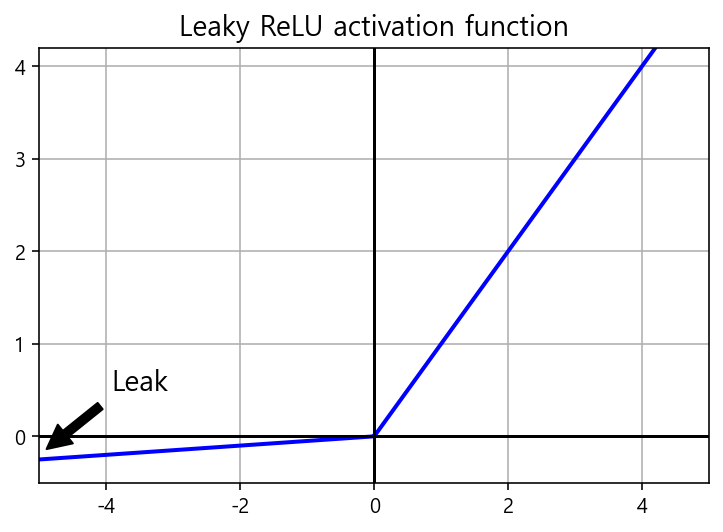

In [35]:
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [36]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [37]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6816 - accuracy: 0.7722 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6217 - accuracy: 0.7943 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

#### 케라스로 배치 정규화 구현

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_102 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_103 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)            

In [43]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0346 - accuracy: 0.6739 - val_loss: 0.6680 - val_accuracy: 0.7888
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6757 - accuracy: 0.7819 - val_loss: 0.5537 - val_accuracy: 0.8210
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5961 - accuracy: 0.8021 - val_loss: 0.4996 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5456 - accuracy: 0.8176 - val_loss: 0.4655 - val_accuracy: 0.8458
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5140 - accuracy: 0.8247 - val_loss: 0.4420 - val_accuracy: 0.8512
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4915 - accuracy: 0.8310 - val_loss: 0.4237 - val_accuracy: 0.8538
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4741 - accuracy: 0.8377 - val_loss: 0.4103 - val_accuracy:

#### 그레이디언트 클리핑

In [48]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

#### 사전 훈련된 층 재사용

In [49]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [50]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [51]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [52]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.5822 - accuracy: 0.8129 - val_loss: 0.3812 - val_accuracy: 0.8660
Epoch 2/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3565 - accuracy: 0.8775 - val_loss: 0.3212 - val_accuracy: 0.8891
Epoch 3/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3184 - accuracy: 0.8897 - val_loss: 0.2934 - val_accuracy: 0.9001
Epoch 4/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2975 - accuracy: 0.8975 - val_loss: 0.2790 - val_accuracy: 0.9043
Epoch 5/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9017 - val_loss: 0.2680 - val_accuracy: 0.9078
Epoch 6/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9058 - val_loss: 0.2616 - val_accuracy: 0.9108
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2645 - accuracy: 0.9094 - val_loss: 0.2610 - val_accuracy:

In [53]:
model_A.save("my_model_A.h5")

In [54]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [56]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 23ms/step - loss: 0.8671 - accuracy: 0.4650 - val_loss: 0.6258 - val_accuracy: 0.6359
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.7650 - val_loss: 0.4965 - val_accuracy: 0.8185
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.4569 - accuracy: 0.8850 - val_loss: 0.4278 - val_accuracy: 0.8763
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3953 - accuracy: 0.9150 - val_loss: 0.3786 - val_accuracy: 0.9067
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3499 - accuracy: 0.9350 - val_loss: 0.3397 - val_accuracy: 0.9351
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3128 - accuracy: 0.9450 - val_loss: 0.3081 - val_accuracy: 0.9452
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2834 - accuracy: 0.9650 - val_loss: 0.2837 - val_accuracy: 0.9554
Epoch 8/20
7/7 [==============

In [57]:
model_B.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_114 (Dense)           (None, 300)               235500    
                                                                 
 dense_115 (Dense)           (None, 100)               30100     
                                                                 
 dense_116 (Dense)           (None, 50)                5050      
                                                                 
 dense_117 (Dense)           (None, 50)                2550      
                                                                 
 dense_118 (Dense)           (None, 50)                2550      
                                                                 
 dense_119 (Dense)           (None, 1)               

In [58]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [59]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [61]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 26ms/step - loss: 1.5563 - accuracy: 0.0500 - val_loss: 1.4224 - val_accuracy: 0.0710
Epoch 2/4
7/7 [==============================] - 0s 9ms/step - loss: 1.4006 - accuracy: 0.0850 - val_loss: 1.2843 - val_accuracy: 0.1045
Epoch 3/4
7/7 [==============================] - 0s 9ms/step - loss: 1.2610 - accuracy: 0.1150 - val_loss: 1.1617 - val_accuracy: 0.1481
Epoch 4/4
7/7 [==============================] - 0s 9ms/step - loss: 1.1372 - accuracy: 0.1700 - val_loss: 1.0495 - val_accuracy: 0.1988
Epoch 1/16
7/7 [==============================] - 0s 25ms/step - loss: 0.8631 - accuracy: 0.3600 - val_loss: 0.6130 - val_accuracy: 0.6988
Epoch 2/16
7/7 [==============================] - 0s 9ms/step - loss: 0.5077 - accuracy: 0.7950 - val_loss: 0.4118 - val_accuracy: 0.9077
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.3429 - accuracy: 0.9500 - val_loss: 0.3062 - val_accuracy: 0.9594
Epoch 4/16
7/7 [===================

In [62]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9825


[0.13373036682605743, 0.9825000166893005]

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9955


[0.07194174081087112, 0.9955000281333923]

In [64]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718